## importing neccessary liberaries

In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import logging

### Load Data

In [25]:
dataset = pd.read_excel("/content/WAR data set.xlsx")

### EDA- Exploratory data analysis

In [26]:
dataset.head()

,Temprature(℃),PH,CaCl₂ (mol/L),Soaking Time (days),Converted Enzyme Conc (g/L),Urea Conc (g/L),Water Absorption reduction (%)
0,35,9.5,0.147273,3,33.944,20.0,15.0
1,25,8.2,0.050909,3,25.458,20.0,8.0
2,30,9.5,0.550000,3,33.944,20.0,22.0
3,30,9.5,0.550000,7,33.944,20.0,27.3
4,30,9.5,0.550000,10,33.944,20.0,28.6


In [27]:
# independent and target variables
X = dataset.drop('Water Absorption reduction (%)', axis = 1)
y = dataset['Water Absorption reduction (%)']

In [28]:
#Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform (X)
X=pd.DataFrame(X,columns=['Temprature(℃)','PH', 'CaCl₂ (mol/L)', 'Soaking Time (days)', 'Converted Enzyme Conc (g/L)', 'Urea Conc (g/L)	'])
X

,Temprature(℃),PH,CaCl₂ (mol/L),Soaking Time (days),Converted Enzyme Conc (g/L),Urea Conc (g/L)\t
0,0.816466,1.296392,-1.176596,-0.444484,-0.483277,-0.764817
1,-0.524001,0.083290,-1.483405,-0.444484,-1.968972,-0.764817
2,0.146233,1.296392,0.105635,-0.444484,-0.483277,-0.764817
3,0.146233,1.296392,0.105635,0.433599,-0.483277,-0.764817
4,0.146233,1.296392,0.105635,1.092162,-0.483277,-0.764817
...,...,...,...,...,...,...
116,-0.524001,-0.103341,1.856762,-0.883526,0.226832,1.727104
117,-0.524001,-0.103341,3.130310,-0.883526,0.226832,1.727104
118,-0.524001,-0.103341,-0.053559,-0.883526,0.226832,2.083093
119,-0.524001,-0.103341,1.538375,-0.883526,0.226832,2.083093


In [29]:
# Train _Test Split
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=64)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=64)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Validation set size: {X_val.shape}")

Training set size: (96, 6)
Testing set size: (13, 6)
Validation set size: (12, 6)


In [30]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [31]:
Ada = AdaBoostRegressor(random_state=0)
Ada.fit(X_train, y_train)

AdaBoostRegressor(random_state=0)

In [32]:
Ada.get_params()

{'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': 0}

In [33]:
y_pred_train = Ada.predict(X_train)
y_pred_test = Ada.predict(X_test)
y_pred_val=Ada.predict(X_val)

In [34]:
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Evaluate on the training set
print("Training Set Metrics:")
print(f'The RMSE on the training dataset is: {sqrt(mean_squared_error(y_train, Ada.predict(X_train))):.4f}')
print(f'The MSE on the training dataset is: {(mean_squared_error(y_train, Ada.predict(X_train))):.4f}')
print(f'The MAE on the training daset is: {mean_absolute_error(y_train, Ada.predict(X_train)):.4f}')
print(f'The r2_score on the training dataset is: {r2_score(y_train, Ada.predict(X_train)):.4f}')
print("-" * 30)

# Evaluate on the testing set
print("Testing Set Metrics:")
print(f'The RMSE on the testing dataset is: {sqrt(mean_squared_error(y_test, Ada.predict(X_test))):.4f}')
print(f'The MSE on the testing dataset is: {(mean_squared_error(y_test, Ada.predict(X_test))):.4f}')
print(f'The MAE on the testing dataset is: {mean_absolute_error(y_test, Ada.predict(X_test)):.4f}')
print(f'The r2_score on the testing dataset is: {r2_score(y_test, Ada.predict(X_test)):.4f}')
print("-" * 30)

# Evaluate on the validation set
print("Validation Set Metrics:")
print(f'The RMSE on the validation dataset is: {sqrt(mean_squared_error(y_val, Ada.predict(X_val))):.4f}')
print(f'The MSE on the validation dataset is: {(mean_squared_error(y_val, Ada.predict(X_val))):.4f}')
print(f'The MAE on the validation dataset is: {mean_absolute_error(y_val, Ada.predict(X_val)):.4f}')
print(f'The r2_score on the validation dataset is: {r2_score(y_val, Ada.predict(X_val)):.4f}')


Training Set Metrics:
The RMSE on the training dataset is: 5.1556
The MSE on the training dataset is: 26.5800
The MAE on the training daset is: 4.3395
The r2_score on the training dataset is: 0.8759
------------------------------
Testing Set Metrics:
The RMSE on the testing dataset is: 4.8780
The MSE on the testing dataset is: 23.7946
The MAE on the testing dataset is: 4.2425
The r2_score on the testing dataset is: 0.9198
------------------------------
Validation Set Metrics:
The RMSE on the validation dataset is: 5.4633
The MSE on the validation dataset is: 29.8474
The MAE on the validation dataset is: 4.6902
The r2_score on the validation dataset is: 0.9167


### Hyperparameter Tunning (Optimization)]

In [35]:
# Define hyperparameter grid
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}


In [36]:
# Perform GridSearchCV to find the best parameters
Ada_grid = GridSearchCV(
    estimator=AdaBoostRegressor(random_state=0),
    param_grid=params,
    cv=5,
    scoring='r2',
    verbose=2,
    n_jobs=-1
)


In [37]:
# Define hyperparameter grid
params = {
    'n_estimators': [100, 200, 300],
    'estimator__max_depth': [10, 20, 30, None],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__max_features': ['sqrt', 'log2']
}

# Perform GridSearchCV to find the best parameters
Ada_grid = GridSearchCV(
    estimator=AdaBoostRegressor(random_state=0, estimator=tree.DecisionTreeRegressor(random_state=0)), # Specify the base estimator
    param_grid=params,
    cv=5,
    scoring='r2',
    verbose=2,
    n_jobs=-1
)
Ada_grid.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=0),
                                         random_state=0),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [10, 20, 30, None],
                         'estimator__max_features': ['sqrt', 'log2'],
                         'estimator__min_samples_leaf': [1, 2, 4],
                         'estimator__min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [38]:
# Print the best parameters
print("Best Parameters from Grid Search:", Ada_grid.best_params_)

Best Parameters from Grid Search: {'estimator__max_depth': 20, 'estimator__max_features': 'sqrt', 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 5, 'n_estimators': 300}


In [39]:
best_Ada = Ada_grid.best_estimator_


In [40]:
y_pred_train = Ada_grid.predict(X_train)
y_pred_test = Ada_grid.predict(X_test)
y_pred_val=Ada_grid.predict(X_val)

In [41]:
# Evaluate on the training set
print("Training Set Metrics:")
print(f'The RMSE on the training dataset is: {sqrt(mean_squared_error(y_train, Ada_grid.predict(X_train))):.4f}')
print(f'The MSE on the training dataset is: {(mean_squared_error(y_train, Ada_grid.predict(X_train))):.4f}')
print(f'The MAE on the training daset is: {mean_absolute_error(y_train, Ada_grid.predict(X_train)):.4f}')
print(f'The r2_score on the training dataset is: {r2_score(y_train, Ada_grid.predict(X_train)):.4f}')
print("-" * 30)

# Evaluate on the testing set
print("Testing Set Metrics:")
print(f'The RMSE on the testing dataset is: {sqrt(mean_squared_error(y_test, Ada_grid.predict(X_test))):.4f}')
print(f'The MSE on the testing dataset is: {(mean_squared_error(y_test, Ada_grid.predict(X_test))):.4f}')
print(f'The MAE on the testing dataset is: {mean_absolute_error(y_test, Ada_grid.predict(X_test)):.4f}')
print(f'The r2_score on the testing dataset is: {r2_score(y_test, Ada_grid.predict(X_test)):.4f}')
print("-" * 30)

# Evaluate on the validation set
print("Validation Set Metrics:")
print(f'The RMSE on the validation dataset is: {sqrt(mean_squared_error(y_val, Ada_grid.predict(X_val))):.4f}')
print(f'The MSE on the validation dataset is: {(mean_squared_error(y_val, Ada_grid.predict(X_val))):.4f}')
print(f'The MAE on the validation dataset is: {mean_absolute_error(y_val, Ada_grid.predict(X_val)):.4f}')
print(f'The r2_score on the validation dataset is: {r2_score(y_val, Ada_grid.predict(X_val)):.4f}')

Training Set Metrics:
The RMSE on the training dataset is: 3.9622
The MSE on the training dataset is: 15.6994
The MAE on the training daset is: 3.0395
The r2_score on the training dataset is: 0.9267
------------------------------
Testing Set Metrics:
The RMSE on the testing dataset is: 3.4576
The MSE on the testing dataset is: 11.9552
The MAE on the testing dataset is: 2.6429
The r2_score on the testing dataset is: 0.9597
------------------------------
Validation Set Metrics:
The RMSE on the validation dataset is: 3.6359
The MSE on the validation dataset is: 13.2197
The MAE on the validation dataset is: 3.0941
The r2_score on the validation dataset is: 0.9631


### Actual vs Predicted Capacity

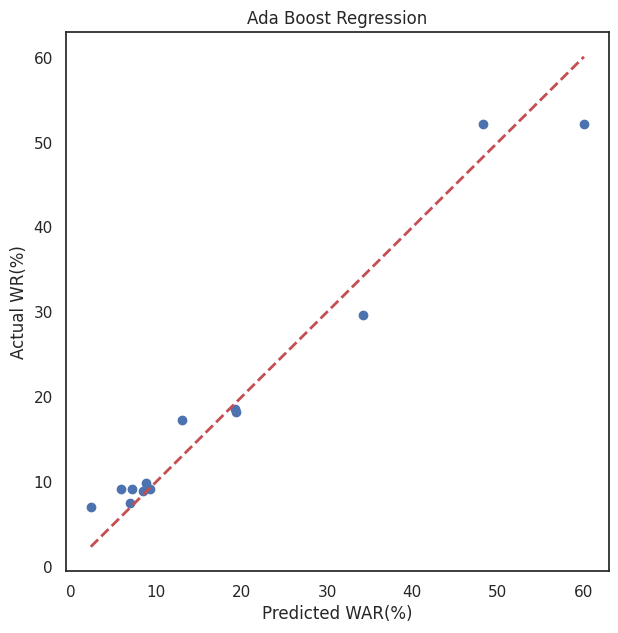

In [42]:
y_predict =best_Ada.predict(X_test)
plt.figure(figsize=(7,7))
sns.set_style('white')
plt.title('Ada Boost Regression')
plt.xlabel("Predicted WAR(%)")
plt.ylabel("Actual WR(%)")
plt.scatter(y_test,y_predict)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()

In [43]:
best_Ada.feature_importances_

array([0.05841699, 0.19285506, 0.1236986 , 0.10634873, 0.19726595,
       0.32141468])

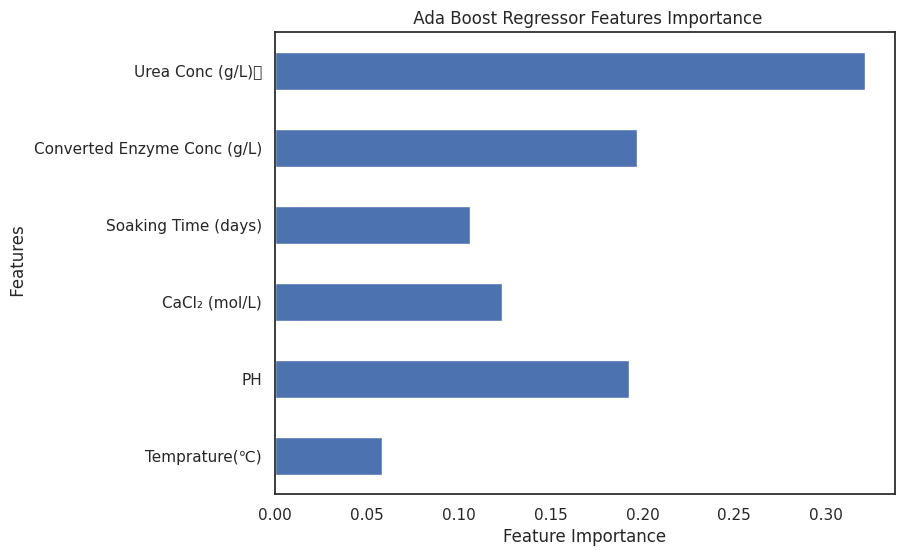

In [44]:
importances = pd.Series(best_Ada.feature_importances_ , index=X.columns)
sns.set_style('white')
importances.plot(kind = 'barh', figsize=(8,6))
plt.xlabel("Feature Importance")
plt.ylabel(" Features")
plt.title(" Ada Boost Regressor Features Importance")
plt.show()